## Data Visualization & Analysis

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import csv
import ast
import os
import cv2

In [2]:
IMG_PATH = {
    "train": "data/train",
    "test": "data/test"
}
CSV_PATH = {
    "train": "data/train.csv"
}

In [3]:
img_dict = {}

In [4]:
with open(CSV_PATH["train"]) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        if row[0] not in img_dict:
            img_dict[row[0]] = [ast.literal_eval(row[3])]
        else:
            img_dict[row[0]].append(ast.literal_eval(row[3]))

**Visulize a training image**

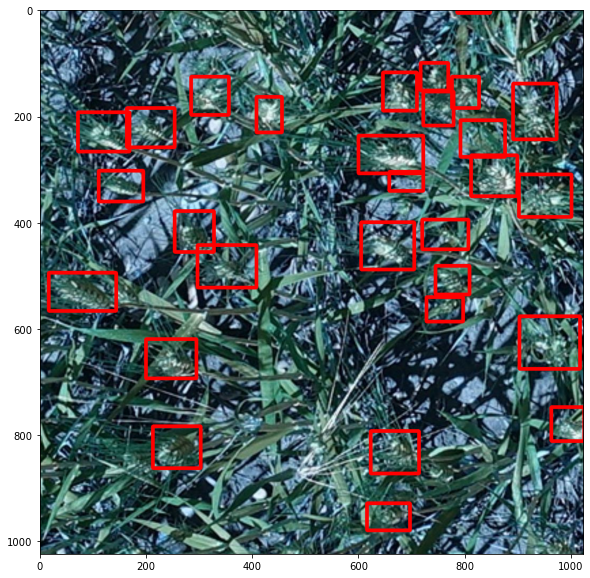

In [24]:
def visualize_train():
    a = np.random.randint(1000)
    path = os.listdir(IMG_PATH["train"])[a]
    bboxes = img_dict[path[:-4]]
    img = cv2.imread(os.path.join(IMG_PATH["train"], path))

    for box in bboxes:
        x= int(box[0])
        y = int(box[1])
        xx = int(box[2])
        yy = int(box[3])
        cv2.rectangle(img, (x,y), (x+xx,y+yy), color = (255, 0, 0) , thickness= 5)

    fig = plt.figure(figsize=(10,10))    
    plt.imshow(img)
    plt.show()
    
visualize_train()

**Average number of wheat in images**

In [32]:
def count_wheat(img_dict):
    count_dict = {}
    count = 0
    for _,img in img_dict.items():
        count = len(img)
        if count not in count_dict:
            count_dict[count] = 1
        else:
            count_dict[count] +=1
    return count_dict 

In [35]:
count_dict = count_wheat(img_dict)

{47: 50, 46: 53, 41: 59, 33: 56, 34: 69, 26: 63, 30: 64, 23: 55, 42: 52, 28: 43, 38: 67, 27: 39, 24: 33, 18: 42, 25: 65, 35: 60, 21: 50, 31: 53, 39: 48, 8: 16, 20: 55, 32: 61, 13: 35, 17: 28, 37: 55, 29: 53, 40: 46, 48: 48, 22: 64, 12: 23, 14: 37, 16: 34, 45: 60, 19: 45, 43: 47, 15: 36, 50: 55, 10: 15, 9: 13, 36: 55, 55: 48, 51: 50, 49: 59, 60: 44, 54: 56, 62: 42, 69: 33, 80: 18, 57: 52, 59: 42, 53: 53, 44: 56, 65: 43, 81: 16, 52: 54, 61: 45, 56: 48, 58: 50, 85: 11, 93: 2, 74: 23, 79: 22, 63: 55, 72: 26, 73: 32, 95: 4, 66: 26, 67: 37, 64: 46, 68: 35, 78: 21, 82: 25, 70: 38, 76: 21, 89: 10, 71: 24, 87: 10, 84: 10, 77: 25, 75: 33, 101: 1, 97: 2, 11: 20, 7: 9, 4: 12, 108: 1, 92: 5, 90: 3, 96: 3, 83: 13, 94: 2, 86: 5, 88: 5, 104: 1, 116: 1, 1: 10, 2: 5, 5: 12, 3: 7, 6: 9}


Most number of wheats in an image: 116
Least number of wheats in an image: 1
Highest frequency number of wheats: 69
Lowest frequency number of wheats: 1


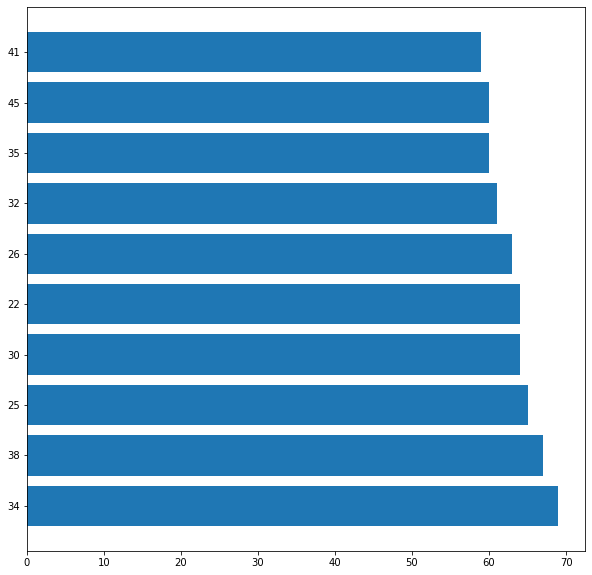

In [68]:
def plot_wheat_freq(count_dict, top_k = 10):
    count_dict = {k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}
    fig = plt.figure(figsize=(10,10))
    freqs_list = list(count_dict.values())[:top_k]
    count_list = range(len(count_dict))[:top_k]
    plt.barh(count_list, freqs_list, align='center')
    plt.yticks(range(len(count_list)), list(count_dict.keys())[:top_k])
    print("Most number of wheats in an image: "+ str(max(count_dict.keys())))
    print("Least number of wheats in an image: "+ str(min(count_dict.keys())))
    print("Highest frequency number of wheats: "+ str(max(count_dict.values())))
    print("Lowest frequency number of wheats: "+ str(min(count_dict.values())))
    
plot_wheat_freq(count_dict)